In [6]:
import networkx
import pandas as pd
!pip install openai
!pip install pandas
!pip install aiohttp
!pip install lxml


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/89/a9/63af38c7f42baff8251d937be91c6decfe9e4725fe16283dcee428e08d5c/lxml-5.3.0-cp39-cp39-macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


First, create list of keywords necessary in the keyword.txt file.

Then, run command with the following command that will give top ten article information from 2022 to 2024 and save data to article_data.csv

In [8]:
!python async_pubmed_scraper.py --pages 1 --start 2018 --stop 2020 --output article_data

/Users/devammondal/PycharmProjects/geneKnowledgeGraphs/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(

Finding PubMed article URLs for 5 keywords found in keywords.txt

Scraping initiated for 50 article URLs found from 2018 to 2020

Preview of scraped article data:

      title     abstract  ...     keywords                                       url
0  NO_TITLE  NO_ABSTRACT  ...  NO_KEYWORDS  https://pubmed.ncbi.nlm.nih.gov/31157963
1  NO_TITLE  NO_ABSTRACT  ...  NO_KEYWORDS  https://pubmed.ncbi.nlm.nih.gov/31292550
2  NO_TITLE  NO_ABSTRACT  ...  NO_KEYWORDS  https://pubmed.ncbi.nlm.nih.gov/31093808
3  NO_TITLE  NO_ABSTRACT  ...  NO_KEYWORDS  https://pubmed.ncbi.nlm.nih.gov/29988080
4  NO_TITLE  NO_ABSTRACT  ...  NO_KEYWORDS  https://pubmed.ncbi.nlm.nih.gov/28925400

[5 rows x 8 columns]

Load the first five entries of the results into a pandas dataframe.

In [2]:
import pandas as pd
firstFive = pd.read_csv('/Users/devammondal/PycharmProjects/geneKnowledgeGraphs/article_data.csv')

In [3]:
abstract = firstFive[35:42]['abstract'][36]
abstract

'B-cell lymphoma extra large (BCL-XL) is a well-validated cancer target. However, the on-target and dose-limiting thrombocytopenia limits the use of BCL-XL inhibitors, such as ABT263, as safe and effective anticancer agents. To reduce the toxicity of ABT263, we converted it into DT2216, a BCL-XL proteolysis-targeting chimera (PROTAC), that targets BCL-XL to the Von Hippel-Lindau (VHL) E3 ligase for degradation. We found that DT2216 was more potent against various BCL-XL-dependent leukemia and cancer cells but considerably less toxic to platelets than ABT263 in vitro because VHL is poorly expressed in platelets. In vivo, DT2216 effectively inhibits the growth of several xenograft tumors as a single agent or in combination with other chemotherapeutic agents, without causing appreciable thrombocytopenia. These findings demonstrate the potential to use PROTAC technology to reduce on-target drug toxicities and rescue the therapeutic potential of previously undruggable targets. Furthermore, 

Goal: get RDF triples for all abstracts.

In [4]:
abstract = "There are four major members of the ErbB receptor family: epidermal growth factor receptor (EGFR/ErbB1), ErbB2, ErbB3, and ErbB4. These receptor tyrosine kinases help regulate cell growth, and abnormalities in these pathways can be associated with diseases like cancer and Alzheimer’s disease. Ligands for ErbB receptors include EGF, epiregulin, and transforming growth factor α (TGFα), which will induce dimerization of receptor subunits upon binding. ErbB1 activation induces recruitment of adaptor proteins SHC, SOS, and GRB2 to the cell surface, switching on signaling pathways involving Ras, Raf, and MEK1/2. This results in ERK translocation to the nucleus and regulation of gene transcription. Pathways involving PLCγ, PKC, and Map kinases are also initiated, which lead to c-Jun and c-Fos activation. Finally, ErbB3 induces PI3K signaling, which promotes cell survival and protein translation."

In [16]:
!pip install openai


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
from openai import OpenAI

In [6]:
prompt = "Given a research abstract, derive all RDF triplets FOR GENE RELATIONSHIPS. THE FORMAT SHOULD BE 'GENE1, UPREGULATES/DOWNREGULATES, GENE2.' RETURN ONLY THE TRIPLETS WITHOUT ANY BRACKETS OR ANY OTHER QUOTATIONS. EVERYTHING MUST BE A SINGLE WORD"

In [7]:
client = OpenAI(api_key='')

#Get continuation.
response = client.chat.completions.create(
        model="gpt-4o",
        temperature = 1,
        top_p = 1,
        frequency_penalty=0,
        presence_penalty=0,
        messages=[
            {"role": "user", "content": f"{prompt}, {abstract}"}])

In [8]:
response

ChatCompletion(id='chatcmpl-9yWsTPJThcClg9XB3rdW7aeU7rfyZ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='EGFR upregulates SHC  \nEGFR upregulates SOS  \nEGFR upregulates GRB2  \nSHC upregulates Ras  \nSOS upregulates Ras  \nGRB2 upregulates Ras  \nRas upregulates Raf  \nRaf upregulates MEK1/2  \nMEK1/2 upregulates ERK  \nERK upregulates gene_transcription  \nPLCγ upregulates c-Jun  \nPLCγ upregulates c-Fos  \nPKC upregulates c-Jun  \nPKC upregulates c-Fos  \nMap_kinases upregulates c-Jun  \nMap_kinases upregulates c-Fos  \nErbB3 upregulates PI3K', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1724213089, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_c9aa9c0491', usage=CompletionUsage(completion_tokens=148, prompt_tokens=288, total_tokens=436))

In [9]:
responses = response.choices[0].message.content.split("\n")

In [10]:
responses

['EGFR upregulates SHC  ',
 'EGFR upregulates SOS  ',
 'EGFR upregulates GRB2  ',
 'SHC upregulates Ras  ',
 'SOS upregulates Ras  ',
 'GRB2 upregulates Ras  ',
 'Ras upregulates Raf  ',
 'Raf upregulates MEK1/2  ',
 'MEK1/2 upregulates ERK  ',
 'ERK upregulates gene_transcription  ',
 'PLCγ upregulates c-Jun  ',
 'PLCγ upregulates c-Fos  ',
 'PKC upregulates c-Jun  ',
 'PKC upregulates c-Fos  ',
 'Map_kinases upregulates c-Jun  ',
 'Map_kinases upregulates c-Fos  ',
 'ErbB3 upregulates PI3K']

In [226]:
!pip install networkx
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [11]:
import networkx as nx

graph = nx.DiGraph()
for response in responses:
        response = response.split(" ")
        graph.add_edge(response[0], response[2], label=response[1])

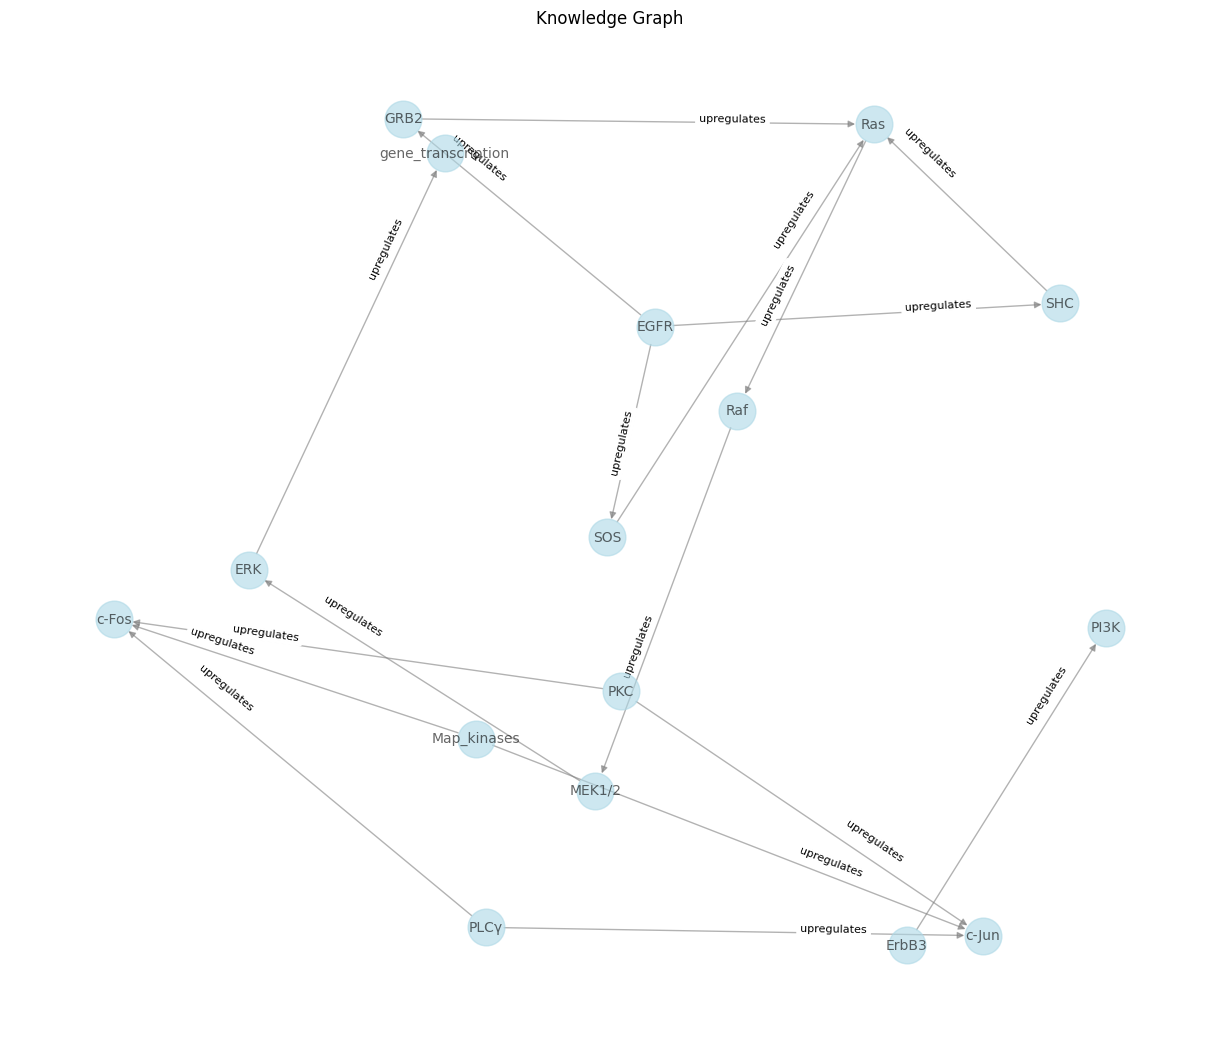

In [12]:
import matplotlib.pyplot as plt 
pos = nx.spring_layout(graph, seed=42, k=0.9)
labels = nx.get_edge_attributes(graph, 'label')
plt.figure(figsize=(12, 10))
nx.draw(graph, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()


Questions:
1. Scraping the entire article and then doing knowledge graph creation?
2.      Key elements not captured. 
3.      Not enough details for creation. 
4.      Literature review: out. 
5.      Scrape abstract, discussions, conclusions. 
2. Enforcing gene names
3.      Cleaning triplets. 
4.      Ensure that the two elements are generic terms. 
5.      RAG databases. 
3. Algorithms for combining knowledge graphs (syntactic sugar with commas, periods, xyz)
4.      Machine learning: transform graph into vectors (work on the combination of the vectors).
5.      Graph -> RDF -> combine RDFs and generate new triplets. 
6. Focus about metametrics about whole genes and use centrality, causality, other metrics. 
7. PageRank. 